# 02.2 Overall Health by State - EVA

1. Imports and display options
1. Data prep
1. Bar charts
1. 
1. Conclusion

## 1. Imports and display options

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#Creating a path to the root directory for this project

path = r'C:\Users\theva\Documents\Data Analyses\BRFSS'

In [3]:
#Importing products.csv to df_prods
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'BRFSS Overall Health by State TABLEAU.pkl'))

In [4]:
#Checking df

df.shape

(385, 35)

In [5]:
#Checking df

df.head()

,location,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,...,Vegetables eaten: Daily,Vegetables eaten: Not daily,Aerobic activity per week: Over 150 min,Aerobic activity per week: Under 150 min,Met physical activity guidelines: Yes,Met physical activity guidelines: No,Strength training: 2x+ per week,Strength training: 1x- per week,Physically active in last month: Yes,Physically active in last month: No
0,Alabama,2015,35.6,33.0,28.9,2.4,16.2,29.1,32.5,15.2,...,72.2,27.8,44.6,55.4,16.7,83.3,25.8,74.2,68.1,31.9
1,Alabama,2016,35.7,33.8,28.4,2.1,15.2,29.8,32.5,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.6,29.4
2,Alabama,2017,36.3,33.9,28.5,1.3,15.4,28.2,33.1,16.2,...,80.7,19.3,42.8,57.2,16.1,83.9,26.0,74.0,68.0,32.0
3,Alabama,2018,36.2,33.4,28.4,2.0,14.5,28.6,34.0,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.3,30.7
4,Alabama,2019,36.1,34.2,27.5,2.2,15.4,29.5,32.4,16.2,...,77.7,22.3,44.8,55.2,17.6,82.4,29.2,70.8,68.5,31.5


In [33]:
#Adjusting display settings

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

%matplotlib inline
sns.set()

# 2. Data Prep

In [7]:
# Getting columnnames

df.columns

Index(['location', 'year', 'BMI: Obese (BMI 30.0 - 99.8)',
       'BMI: Overweight (BMI 25.0-29.9)', 'BMI: Normal Weight (BMI 18.5-24.9)',
       'BMI: Underweight (BMI 12.0-18.4)', 'General health: Excellent',
       'General health: Very good', 'General health: Good',
       'General health: Fair', 'General health: Poor',
       'Health status: Good or Better', 'Health status: Fair or Poor',
       'Doc visit: Past year', 'Doc visit: Past 2 years',
       'Doc visit: Past 5 years', 'Doc visit: 5+ years ago',
       'Doc visit: Never', 'Concentrate, remember, decide: Difficult',
       'Concentrate, remember, decide: Not difficult',
       'Bad mental health days: 0', 'Bad mental health days: 1-13',
       'Bad mental health days: 14+', 'Fruit eaten: Daily',
       'Fruit eaten: Not daily', 'Vegetables eaten: Daily',
       'Vegetables eaten: Not daily',
       'Aerobic activity per week: Over 150 min',
       'Aerobic activity per week: Under 150 min',
       'Met physical activity g

In [8]:
# Dropping location, calculated health statuses, and negative response to binary question pairs, 
# i.e.: keeping 'Fruit eaten: Daily' and dropping 'Fruit eaten: Not daily'.

eva = df.drop(columns=['location',
                       'Health status: Good or Better',
                       'Health status: Fair or Poor',
                      'Concentrate, remember, decide: Not difficult',
                      'Fruit eaten: Not daily',
                      'Vegetables eaten: Not daily',
                      'Aerobic activity per week: Under 150 min',
                      'Met physical activity guidelines: No',
                      'Strength training: 1x- per week',
                      'Physically active in last month: No'])

In [9]:
#Checking changes

eva.head()

,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
0,2015,35.6,33.0,28.9,2.4,16.2,29.1,32.5,15.2,7.0,...,15.0,NaN,NaN,NaN,51.7,72.2,44.6,16.7,25.8,68.1
1,2016,35.7,33.8,28.4,2.1,15.2,29.8,32.5,15.7,6.9,...,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.6
2,2017,36.3,33.9,28.5,1.3,15.4,28.2,33.1,16.2,7.1,...,15.8,NaN,NaN,NaN,55.2,80.7,42.8,16.1,26.0,68.0
3,2018,36.2,33.4,28.4,2.0,14.5,28.6,34.0,15.7,7.2,...,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.3
4,2019,36.1,34.2,27.5,2.2,15.4,29.5,32.4,16.2,6.5,...,16.7,58.0,24.5,17.5,53.9,77.7,44.8,17.6,29.2,68.5


# 3. Bar charts

### Year

In [65]:
# Making year dataframe

to_plot = eva.groupby(['year']).mean()
to_plot = to_plot.applymap(lambda x: 1 if (x>0) else 0)
to_plot

,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,Doc visit: Past year,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
year,,,,,,,,,,,,,,,,,,,,,
2015,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
2016,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2017,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
2018,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2019,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2020,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,1
2021,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1


<AxesSubplot:ylabel='year'>

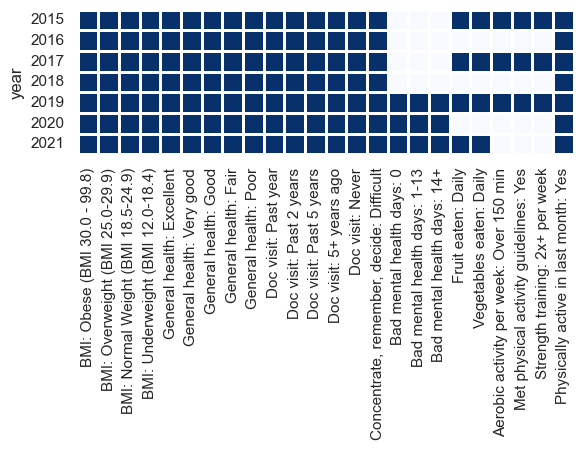

In [66]:
#Plotting to_plot

#sns.catplot(x=to_plot.columns, y=to_plot.index)
sns.heatmap(to_plot, linecolor='white', linewidth=2, cmap='Blues', cbar=False, square=True, xticklabels=True)

<div class='alert alert-block alert-info'>
    <b>Bad mental health days</b> only have records for 2019-2021.<br>
    <b>Fruit and Vegetables eaten</b> only have records for odd years.<br>
    <b>Aerobic activity per week, Met physical activity guidelines, and Strength training</b> only have records for 2015, 2017, and 2019.<br>
    <br>
    All other variables have some records for each year.
   </div>

### BMI

In [72]:
# Making BMI dataframe

to_plot = eva.iloc[:,1:5].mean().copy()
to_plot

BMI: Obese (BMI 30.0 - 99.8)          31.265195
BMI: Overweight (BMI 25.0-29.9)       34.944935
BMI: Normal Weight (BMI 18.5-24.9)    31.946234
BMI: Underweight (BMI 12.0-18.4)       1.837795
dtype: float64

<AxesSubplot:>

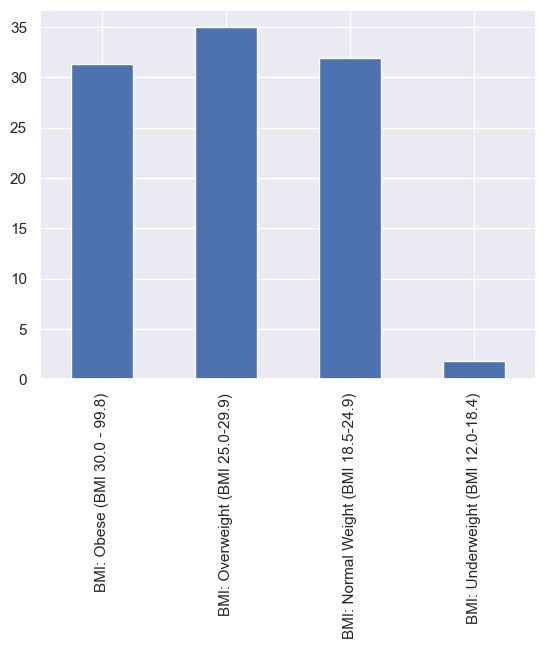

In [73]:
#Plotting to_plot

to_plot.plot.bar()

<div class='alert alert-block alert-info'>
    <b>31% of Americans are obese.</b><br>
    <b>35% of Americans are overweight.</b><br>
    <em>32% of Americans are normal weight.</em><br>
    2% of Americans are underweight.
   </div>

### General Health

In [75]:
# Making general health dataframe

to_plot = eva.iloc[:,5:10].mean().copy()
to_plot

General health: Excellent    18.677143
General health: Very good    32.645195
General health: Good         31.484935
General health: Fair         12.795844
General health: Poor          4.397922
dtype: float64

<AxesSubplot:>

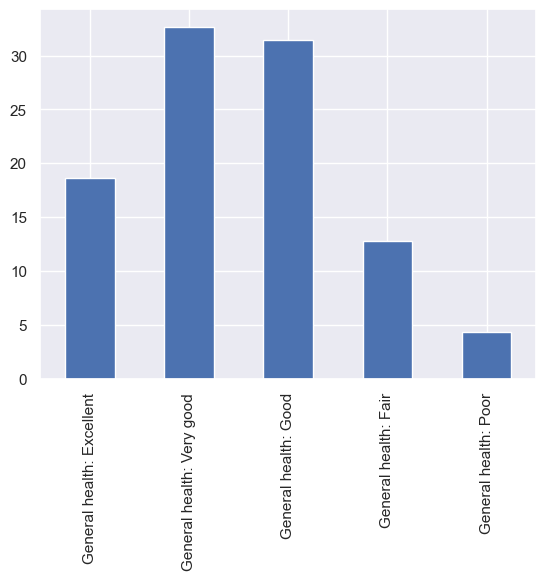

In [76]:
#Plotting to_plot

to_plot.plot.bar()

<div class='alert alert-block alert-info'>
    18% of Americans report being in excellent health.<br>
    <b>65% of Americans report being in good or very good health.</b><br>
    13% of Americans report being in fair health.<br>
    4% of Americans report being in poor health.
   </div>

### Doctor visits

In [82]:
# Making doctor visits dataframe

to_plot = eva.iloc[:,10:15].mean().copy()
to_plot

Doc visit: Past year       73.182597
Doc visit: Past 2 years    12.429610
Doc visit: Past 5 years     7.045974
Doc visit: 5+ years ago     6.465885
Doc visit: Never            0.969419
dtype: float64

<AxesSubplot:>

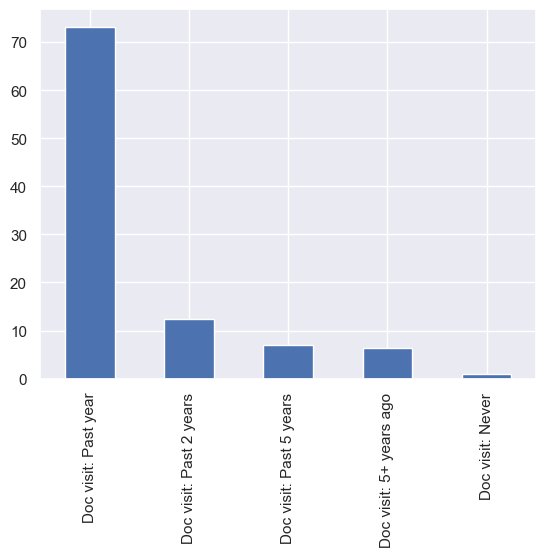

In [83]:
#Plotting to_plot

to_plot.plot.bar()

<div class='alert alert-block alert-info'>
    <b>72% of Americans have seen a doctor in the last year.</b><br>
    84% of Americans have seen a doctor in the last 2 years.<br>
    <b>Only 1% of Americans have never seen a doctor.
   </div>

### Mental Health

In [84]:
# Making mental health dataframe

to_plot = eva.iloc[:,15:19].mean().copy()
to_plot

Concentrate, remember, decide: Difficult    11.403117
Bad mental health days: 0                   61.115854
Bad mental health days: 1-13                24.821341
Bad mental health days: 14+                 14.040854
dtype: float64

<AxesSubplot:>

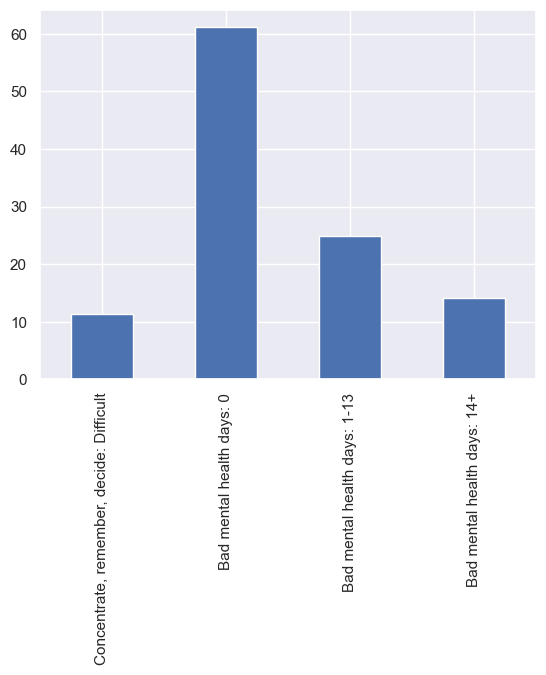

In [85]:
#Plotting to_plot

to_plot.plot.bar()

<div class='alert alert-block alert-info'>
    11% of Americans experience difficulty concentrating, remembering, and/or deciding.<br>
    <b>61% of Americans experience no days of bad mental health per year.</b><br>
    25% of Americans experience 1-13 days of bad mental health per year.<br>
    14% of Americans experience 14 or more days of bad health per year.
   </div>

### DietaryHealth

In [86]:
# Making mental health dataframe

to_plot = eva.iloc[:,19:21].mean().copy()
to_plot

Fruit eaten: Daily         60.250228
Vegetables eaten: Daily    79.415068
dtype: float64

<AxesSubplot:>

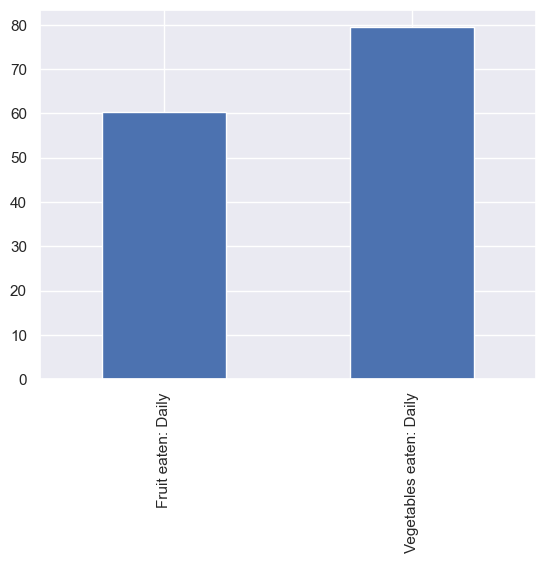

In [87]:
#Plotting to_plot

to_plot.plot.bar()

<div class='alert alert-block alert-info'>
    60% of Americans eat fruit daily.<br>
    <b>79% of Americans eat vegetables daily.</b><br>
   </div>

### Physical activity

In [88]:
# Making mental health dataframe

to_plot = eva.iloc[:,21:].mean().copy()
to_plot

Aerobic activity per week: Over 150 min    50.448171
Met physical activity guidelines: Yes      20.904268
Strength training: 2x+ per week            31.435366
Physically active in last month: Yes       74.837922
dtype: float64

<AxesSubplot:>

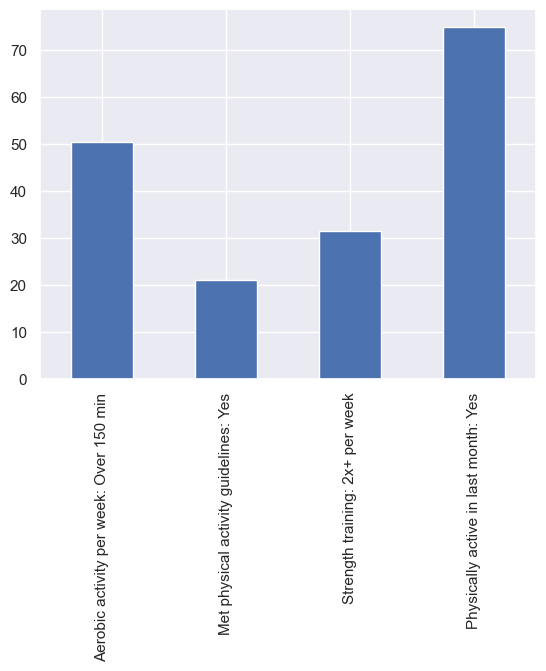

In [89]:
#Plotting to_plot

to_plot.plot.bar()

<div class='alert alert-block alert-info'>
    50% of Americans engage aerobic activity for in 150 minutes or more per week.<br>
    <b>21% of Americans met the BRFSS physical activity guidelines.</b><br>
    31% of Americans strength train 2 or more times per week.<br>
    <b>76% of Americans are physically active at least once a month.</b>
   </div>

# 6. Conclusion

<div class='alert alert-block alert-warning'><b>
    <li>Bad mental health days: 0, Bad mental health days: 1-13, Bad mental health days: 14+, Aerobic activity per week: 150 min, Met physical activity guidelines: yes, and Strength training: 2x+ per week will not add insight to the COVID-19 analysis due to their lack of records.<br>
     <li>66% of Americans are overweight or obese.<br>
     <li>83% of Americans feel they are in good, very good, or excellent health.<br>
     <li>84% of Americans see a doctor at least once every two years.<br>
     <li>61% of Americans experience 0 days of bad mental health per year.<br>
     <li>14% of Americans experience 14 or more days of bad health per year.<br>
     <li>11% of Americans experience difficulty concentrating, remembering, and/or deciding.<br>
     <li>Most Americans consume fruits and vegetables daily.<br>
     <li>Only 21% of Americans meet the BRFSS physical activity guidelines.<br>
     <li>24% of Americans can go an entire month without any physical activity.
    </b></div>